# Monte Carlo simulation

_Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution._ ~Wikepedia

_Monte Carlo simulation performs risk analysis by building models of possible results by substituting a range of values—a probability distribution—for any factor that has inherent uncertainty. It then calculates results over and over, each time using a different set of random values from the probability functions._

_In principle, Monte Carlo methods can be used to solve any problem having a probabilistic interpretation. By the law of large numbers, integrals described by the expected value of some random variable can be approximated by taking the empirical mean (a.k.a. the sample mean) of independent samples of the variable. When the probability distribution of the variable is parametrized, mathematicians often use a Markov chain Monte Carlo (MCMC) sampler.The central idea is to design a judicious Markov chain model with a prescribed stationary probability distribution_
~Wikepedia


In Simpler words, Monte Carlo Simulation is a method of estimating the value of an unknown quantity using the principles of inferential statistics.

## Example

simple random experiment: pick a bead at random from a bag that contains three blue beads and two red ones. Random number generators permit us to mimic the process of picking at random.

An example is the sample function in R. We demonstrate its use in the code below. First, we use the function rep to generate the urn:

In [1]:
(beads <- rep(c("red", "blue"), times = c(2,3)))

[1] "red"  "red"  "blue" "blue" "blue"

and then use sample to pick a bead at random:

In [2]:
sample(beads, 1)

[1] "red"

This line of code produces one random outcome. We want to repeat this experiment an infinite number of times, but it is impossible to repeat forever. Instead, we repeat the experiment a _large enough_ number of times to make the results practically equivalent to repeating forever. _*This is an example of a Monte Carlo simulation.*_



To perform our first Monte Carlo simulation, we use the replicate function, which permits us to repeat the same task any number of times. Here, we repeat the random event  $B=10,000$ times:

In [3]:
B <- 10000
events <- replicate(B, sample(beads, 1))

We can now see if our definition actually is in agreement with this Monte Carlo simulation approximation. We can use table to see the distribution:

In [4]:
(tab <- table(events))

events
blue  red 
5997 4003 

and prop.table gives us the proportions:

In [5]:
prop.table(tab)

events
  blue    red 
0.5997 0.4003 

The numbers above are the estimated probabilities provided by this Monte Carlo simulation. Statistical theory, tells us that as  B gets larger, the estimates get closer to 3/5=.6 and 2/5=.4.(converge to it's population parameters)

Although this is a simple and not very useful example,mostly, Monte Carlo simulations are used to estimate probabilities in cases in which it is harder to compute the exact ones. 


## Monty Hall problem

In the 1970s, there was a game show called “Let’s Make a Deal” and Monty Hall was the host. At some point in the game, contestants were asked to pick one of three doors. Behind one door there was a prize. The other doors had a goat behind them to show the contestant they had lost. After the contestant picked a door, before revealing whether the chosen door contained a prize, Monty Hall would open one of the two remaining doors and show the contestant there was no prize behind that door. Then he would ask “Do you want to switch doors?” What would you do?

We can use probability to show that if you stick with the original door choice, your chances of winning a prize remain 1 in 3. However, if you switch to the other door, your chances of winning double to 2 in 3! This seems counterintuitive. Many people incorrectly think both chances are 1 in 2 since you are choosing between 2 options. Below we use a _Monte Carlo simulation_ to see which strategy is better. 



Let’s start with the stick strategy:

In [6]:
B <- 10000
monty_hall <- function(strategy){
  doors <- as.character(1:3)
  prize <- sample(c("car", "goat", "goat"))
  prize_door <- doors[prize == "car"]
  
  
  my_pick  <- sample(doors, 1)
  show <- sample(doors[!doors %in% c(my_pick, prize_door)],1)
  
  stick <- my_pick
  switch <- doors[!doors%in%c(my_pick, show)]
  
  choice <- ifelse(strategy == "stick", stick, switch)
  choice == prize_door
}

stick <- replicate(B, monty_hall("stick"))
mean(stick)

switch <- replicate(B, monty_hall("switch"))
mean(switch)

[1] 0.3298

[1] 0.6689

Note: The $\%in\%$ operator in R can be used to identify if an element (e.g., a number) belongs to a vector or dataframe. For example, it can be used the see if the number 1 is in the sequence of numbers 1 to 10.

In [7]:
1 %in% c(1:10)

x <- c(1,5)
y <- seq(1:5)
x %in% y
x==y #does not even work

y %in% x

#try these
y2=c(1,5)
x==y2
#TRUE TRUE

y3=c(1,3)
x==y3
#TRUE FALSE

y4=c(5,1)
x==y4
#FALSE FALSE

[1] TRUE

[1] TRUE TRUE

Warning message in x == y:
"longer object length is not a multiple of shorter object length"


[1]  TRUE FALSE FALSE FALSE FALSE

[1]  TRUE FALSE FALSE FALSE  TRUE

[1] TRUE TRUE

[1]  TRUE FALSE

[1] FALSE FALSE

Using the $\%in\%$ operator you can compare vectors of different lengths to see if elements of one vector match at least one element in another.

 Read more: <https://www.marsja.se/how-to-use-in-in-r/>
 

## Birthday problem

Suppose you are in a classroom with 50 people. If we assume this is a randomly selected group of 50 people, what is the chance that at least two people have the same birthday? Although it is somewhat advanced, we can deduce this mathematically. We will do this later. Here we use a Monte Carlo simulation. For simplicity, we assume nobody was born on February 29. This actually doesn’t change the answer much.

First, note that birthdays can be represented as numbers between 1 and 365, so a sample of 50 birthdays can be obtained like this:

In [8]:
n <- 50
bdays <- sample(1:365, n, replace = TRUE)
bdays

[1] 172  52  47 194 335  37 238 354  67  18 179  30 214  95  13  74 188 262 326
[20] 180 157 237 267 306  17 182 315 177 266 185 318 297 166 344 288 262 167 102
[39]  39   9 164  99 268 345 111  51 193 313  62 177

To check if in this particular set of 50 people we have at least two with the same birthday, we can use the function duplicated, which returns TRUE whenever an element of a vector is a duplicate. Here is an example:

In [9]:
duplicated(c(1,2,3,1,4,3,5))
any(duplicated(c(1,2,3,1,4,3,5)))

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE

[1] TRUE

The second time 1 and 3 appear, we get a TRUE. So to check if two birthdays were the same, we simply use the any and duplicated functions like this:

In [10]:
any(duplicated(bdays))

[1] TRUE

In this case, we see that it did happen. At least two people had the same birthday.

To estimate the probability of a shared birthday in the group, we repeat this experiment by sampling sets of 50 birthdays over and over:

In [11]:
B <- 10000
same_birthday <- function(n){
  bdays <- sample(1:365, n, replace=TRUE)
  any(duplicated(bdays))
}
results <- replicate(B, same_birthday(50))
mean(results)

[1] 0.9702

Were you expecting the probability to be this high?

People tend to underestimate these probabilities. To get an intuition as to why it is so high, think about what happens when the group size is close to 365. At this stage, we run out of days and the probability is one.

Say we want to use this knowledge to bet with friends about two people having the same birthday in a group of people. When are the chances larger than 50%? Larger than 75%?

Let’s create a look-up table. We can quickly create a function to compute this for any group size:

In [12]:
compute_prob <- function(n, B=10000){
  results <- replicate(B, same_birthday(n))
  mean(results)
}

Using the function sapply, we can perform element-wise operations on any function:

In [13]:
n <- seq(1,60)
prob <- sapply(n, compute_prob)

We can now make a plot of the estimated probabilities of two people having the same birthday in a group of size n:

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.1     v purrr   1.0.1
v tibble  3.1.8     v dplyr   1.1.0
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.4     v forcats 1.0.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


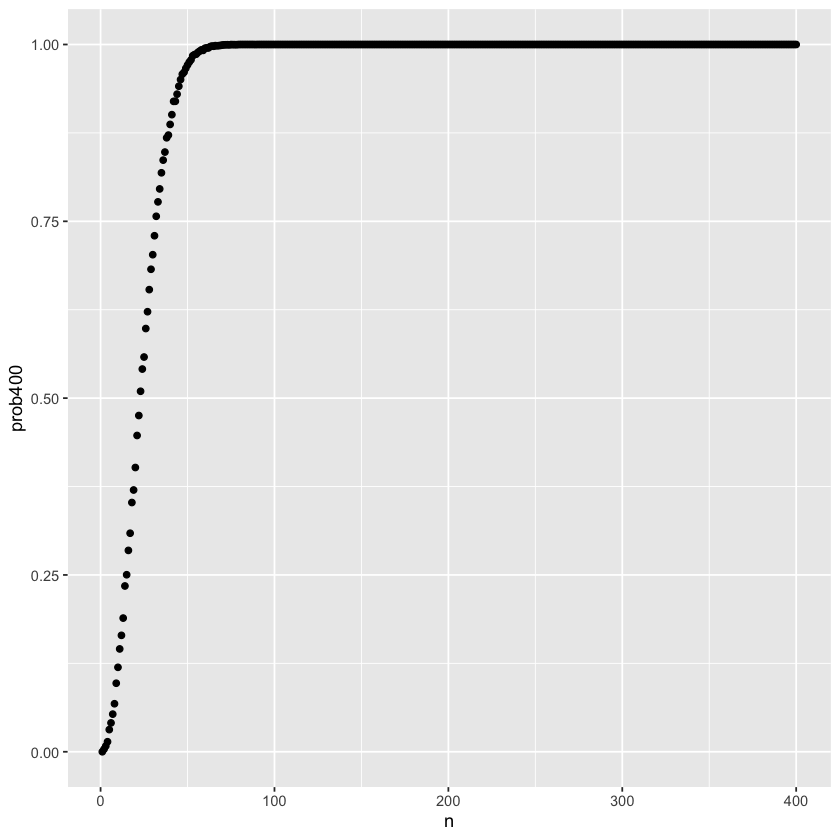

In [14]:
library(tidyverse)
n <-seq(1,400)
prob400 <- sapply(n, compute_prob)
qplot(n, prob400)

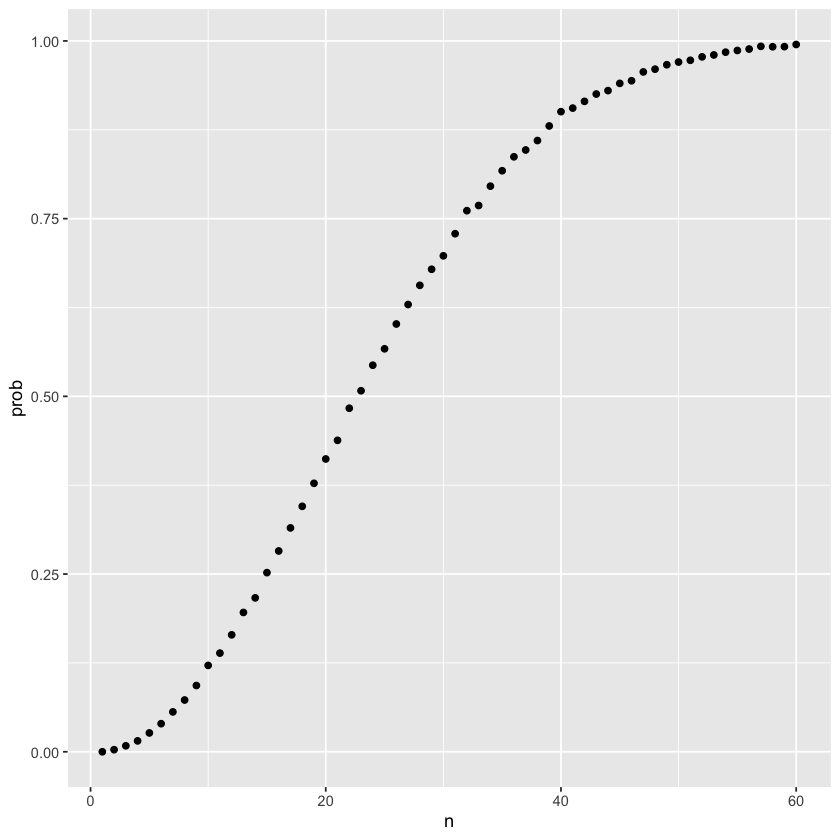

In [15]:
n <- seq(1,60)
prob <- sapply(n, compute_prob)
qplot(n, prob)

Now let’s compute the exact probabilities rather than use Monte Carlo approximations. Not only do we get the exact answer using math, but the computations are much faster since we don’t have to generate experiments.

To make the math simpler, instead of computing the probability of it happening, we will compute the probability of it not happening. For this, we use the multiplication rule.

Let’s start with the first person. The probability that person 1 has a unique birthday is 1. The probability that person 2 has a unique birthday, given that person 1 already took one, is 364/365. Then, given that the first two people have unique birthdays, person 3 is left with 363 days to choose from. We continue this way and find the chances of all 50 people having a unique birthday is:

$$1 \times \frac{364}{365} \times \frac{363}{365}... \frac{365-n+1}{365} $$


We can write a function that does this for any number:

[1] 0.9703736

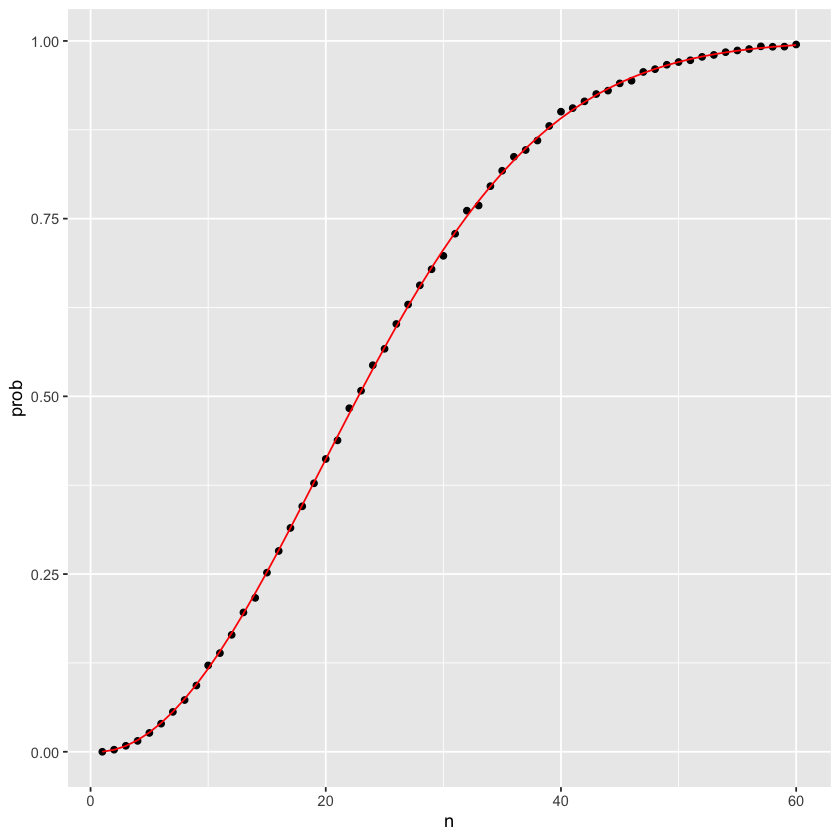

In [16]:
exact_prob <- function(n){
  prob_unique <- seq(365,365-n+1)/365 
  1 - prod( prob_unique)
}

exact_prob(50)


eprob <- sapply(n, exact_prob)
qplot(n, prob) + geom_line(aes(n, eprob), col = "red")

This plot shows that the _Monte Carlo simulation_ provided a very good estimate of the exact probability. Had it not been possible to compute the exact probabilities, we would have still been able to accurately estimate the probabilities.


## Monte Carlo Simulation

The theory described here requires repeating experiments over and over forever. In practice we can’t do this. In the examples above, we used  $B=10,000$ Monte Carlo experiments and it turned out that this provided accurate estimates. The larger this number, the more accurate the estimate becomes until the approximaton is so good that your computer can’t tell the difference. But in more complex calculations, 10,000 may not be nearly enough. Also, for some calculations, 10,000 experiments might not be computationally feasible. In practice, we won’t know what the answer is, so we won’t know if our Monte Carlo estimate is accurate. We know that the larger B, the better the approximation. But how big do we need it to be? This is actually a challenging question and answering it often requires advanced theoretical statistics training.

One practical approach we will describe here is to check for the stability of the estimate. The following is an example with the birthday problem for a group of 25 people.

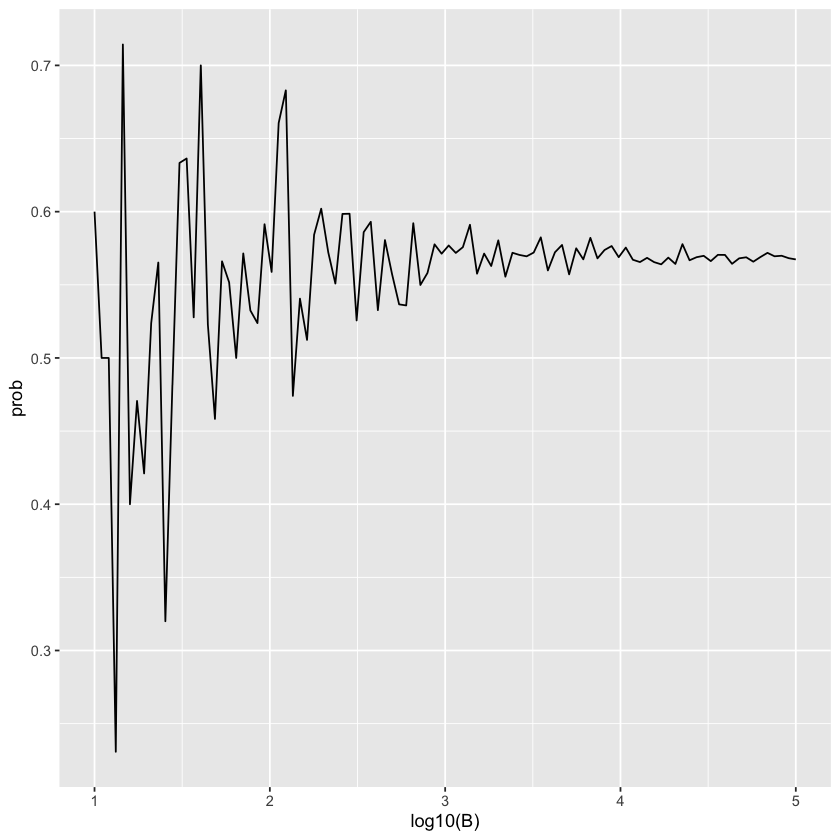

In [17]:
B <- 10^seq(1, 5, len = 100)
compute_prob <- function(B, n=25){
  same_day <- replicate(B, same_birthday(n))
  mean(same_day)
}
prob <- sapply(B, compute_prob)
qplot(log10(B), prob, geom = "line")

In [18]:
exact_prob(25)

[1] 0.5686997

In this plot, we can see that the values start to stabilize (that is, they vary less than .01) around 1000. Note that the exact probability, which we know in this case, is 0.569.


_Reference: Rafael A. Irizarry, Data Analysis and Prediction Algorithms with R_
